## Sample Example for Linear Regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report


Intercept = 50000.00000000012
Slope = 1999.9999999999995


Text(0.5, 1.0, 'Simple Example for Linear Regression')

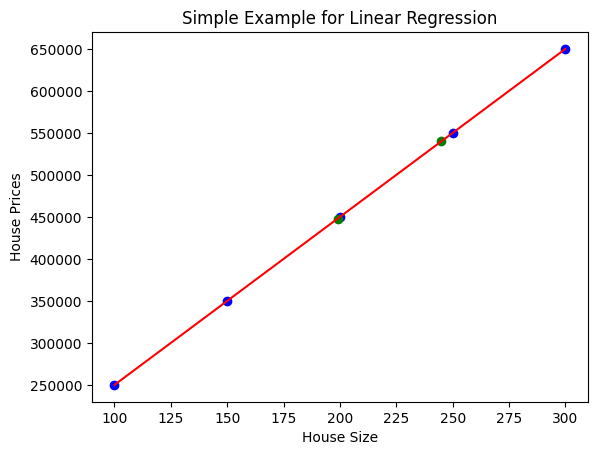

In [30]:
x = np.array([100,150,200,250,300]).reshape(-1,1) # Taking house Sizes in square feet

y = np.array([250000,350000,450000,550000,650000]) # Taking house prices in square feet

model = LinearRegression()
model.fit(x,y) # Dependent,Independent variables

new_house_size = np.array([245,199]).reshape(-1,1)

predicted_prices = model.predict(new_house_size)

print("Intercept =",model.intercept_)
print("Slope =",model.coef_[0])

plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,model.predict(x),color='red',label="Regression Line")
plt.scatter(new_house_size,predicted_prices,color="Green",label="Predictions")
plt.xlabel('House Size')
plt.ylabel('House Prices')
plt.title("Simple Example for Linear Regression")


Mean squared error is:  3035.060115291269
Weights:  [941.43097333]
Intercept:  153.39713623331644


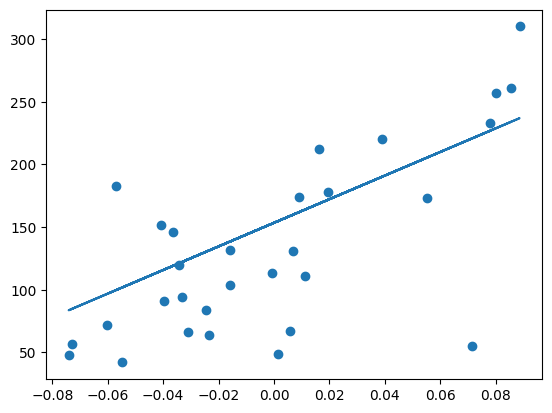

In [41]:
diabetes = datasets.load_diabetes() 

diabetes_x = diabetes.data[:, np.newaxis, 2]    


diabetes_x_train = diabetes_x[:-30]
diabetes_x_test = diabetes_x[-30:]

diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]


model = LinearRegression()

model.fit(diabetes_x_train, diabetes_y_train)
diabetes_y_predict = model.predict(diabetes_x_test)

print("Mean squared error is: ", mean_squared_error(diabetes_y_test, diabetes_y_predict))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

plt.scatter(diabetes_x_test, diabetes_y_test)
plt.plot(diabetes_x_test, diabetes_y_predict)
plt.show()

## Classification

In [13]:
iris = datasets.load_iris()

features = iris.data
labels = iris.target


# Training the classifier 
clf = KNeighborsClassifier()
clf.fit(features,labels)

pred = clf.predict([[4.56,1.45,1.45,5.4]])
print(pred)


[1]


MAE : 9.0, MSE : 83.25, R2 : -2.33
Predicted Score : 83.83333333333334


d:\python\MachineLearning\Learn Scitkit 1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


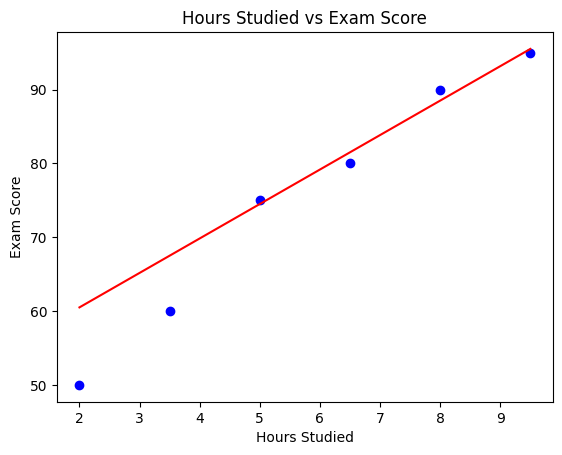

In [4]:
data = pd.DataFrame({
    'Hours Studied' : [2,3.5,5,6.5,8,9.5],
    "Exam Score" : [50,60,75,80,90,95]
})

x = data[['Hours Studied']]
y = data['Exam Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Random state is seed value for Equal division

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MAE : {mae}, MSE : {mse}, R2 : {r2}')

new_data = [[7]]    

predicted_sc = model.predict(new_data)
print(f'Predicted Score : {predicted_sc[0]}')

plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()


## Logistic Regression

[0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 

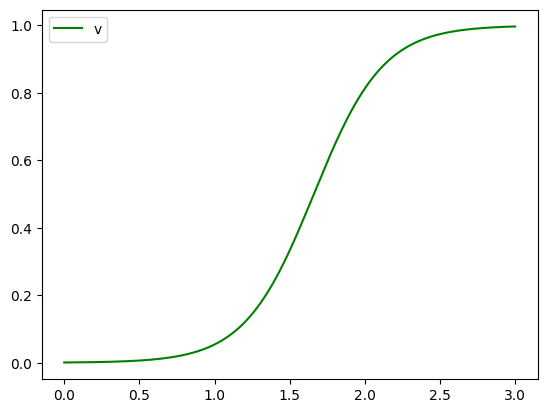

In [61]:
# Train Logistic Regression classifier to predict whether flower is iris virginica or not

iris = datasets.load_iris()

# print(list(iris.keys()))

# print(iris["DESCR"])

# Using only one feature 

x = iris["data"][:,3:] #Another method to convert the array into the 2-D format
y = (iris["target"] == 2).astype(np.int32)

clf = LogisticRegression()
clf.fit(x,y)

pred = clf.predict([[0.2]])

print(pred)

# Plotting using matplotlib
x_new = np.linspace(0,3,1000).reshape(-1,1) #creates 2-D array where many rows in single column while (1,-1) creates 2-D array which contains single Row and many columns
y_prob = clf.predict_proba(x_new)

arr = np.array([1 if x > 0.5 else 0 for x in y_prob[:,1]])
print(arr)
plt.plot(x_new,y_prob[:,1], "g-")
plt.legend("verginica")

plt.show()



In [62]:
data = pd.read_csv("titanic.csv")


data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())


data = data.drop(["PassengerId","Name","Sex","Cabin","Ticket","Embarked"],axis=1)

x = data.drop(["Survived"],axis=1)
y = data["Survived"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Random state is seed value for Equal division

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy}")


conf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion mat : {conf_matrix}")

class_rep = classification_report(y_test,y_pred)

print(class_rep)



Accuracy = 0.6190476190476191
Confusion mat : [[48  2]
 [30  4]]
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        50
           1       0.67      0.12      0.20        34

    accuracy                           0.62        84
   macro avg       0.64      0.54      0.47        84
weighted avg       0.64      0.62      0.53        84

